<a href="https://colab.research.google.com/github/candido05/Repositorio-do-livro-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow-/blob/main/Capitulo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 10 - Introdução às Redes Neurais Artificiais com Keras

In [48]:
import tensorflow as tf
from tensorflow import keras

### Constrindo um modelo de classificação com Keras

Usando o Keras para carregar o conjunto de dados

In [49]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [50]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [51]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

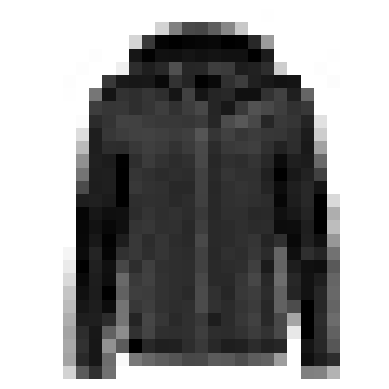

In [52]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [53]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [54]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [55]:
class_names[y_train[0]]

'Coat'

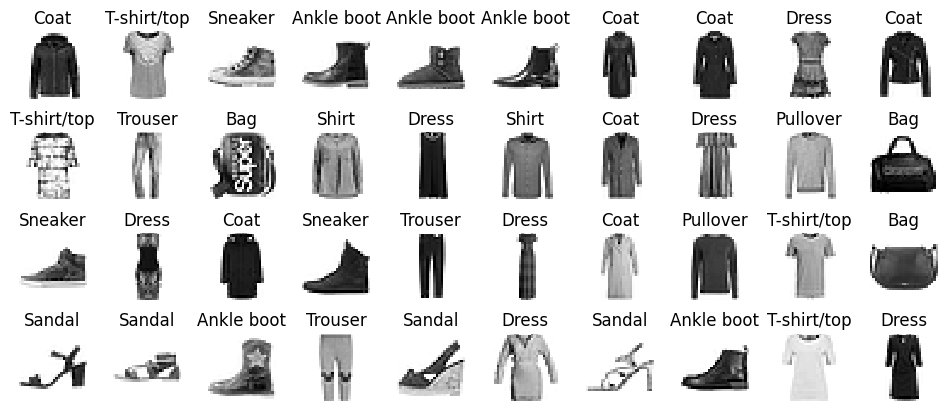

In [56]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Criando o modelo usando a sequencial API

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


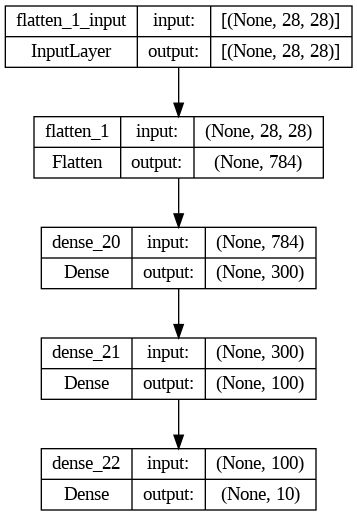

In [59]:
keras.utils.plot_model(model, show_shapes=True)

In [60]:
model.layers

Compilando o modelo

In [61]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

Treinamento e avaliação do modelo

In [62]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.7142 - accuracy: 0.7640 - val_loss: 0.4891 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4809 - accuracy: 0.8327 - val_loss: 0.4613 - val_accuracy: 0.8352
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4385 - accuracy: 0.8463 - val_loss: 0.4105 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4104 - accuracy: 0.8568 - val_loss: 0.3890 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3924 - accuracy: 0.8619 - val_loss: 0.3959 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8664 - val_loss: 0.3875 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3633 - accuracy: 0.8719 - val_loss: 0.3939 - val_accuracy

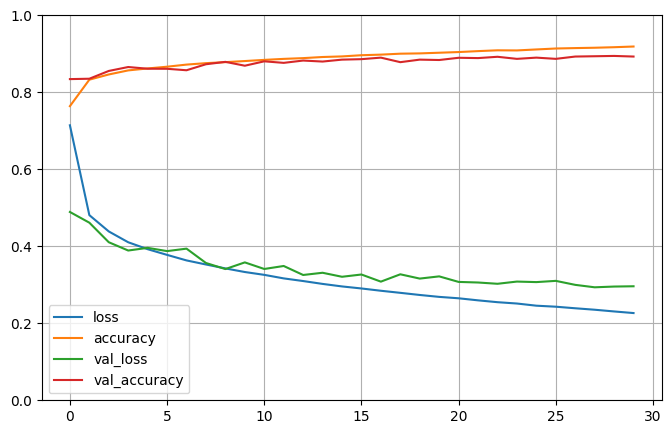

In [63]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1) #definindo o intervalo vertical para 0 e 1
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8845


[0.322902113199234, 0.8845000267028809]

Usando o modelo para fazer predições

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 91ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [66]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [67]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

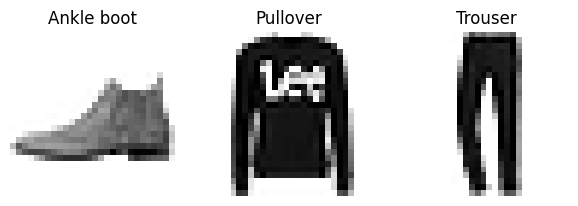

In [68]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Construindo uma MLP de regressão usando Keras

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [70]:
# Criando, treinando, avaliando e usando uma MLP de regressão

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_squared_error, optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8757 - val_loss: 1.3735
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2942 - val_loss: 0.4445
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4122 - val_loss: 0.4122
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3940 - val_loss: 0.4012
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3830 - val_loss: 0.3870
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3718 - val_loss: 0.3722
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3656 - val_loss: 0.3704
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3729 - val_loss: 0.3719
Epoch 9/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3588 - val_loss: 0.3611
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3495 - val_loss: 0.3699

In [71]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[1.1981219],
       [3.6736743],
       [1.0550848]], dtype=float32)

Constrindo modelos complexos

In [72]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [73]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_25 (Dense)            (None, 30)                   270       ['input_2[0][0]']             
                                                                                                  
 dense_26 (Dense)            (None, 30)                   930       ['dense_25[0][0]']            
                                                                                                  
 concatenate_2 (Concatenate  (None, 38)                   0         ['input_2[0][0]',             
 )                                                                   'dense_26[0][0]']      

In [74]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.7808 - val_loss: 0.6715
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6568 - val_loss: 0.5935
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6055 - val_loss: 0.5630
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5766 - val_loss: 0.5378
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5527 - val_loss: 0.5203
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5330 - val_loss: 0.5034
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5158 - val_loss: 0.4898
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5014 - val_loss: 0.4767
Epoch 9/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4885 - val_loss: 0.4661
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4779 - val_loss: 0.4577

In [75]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7943 - val_loss: 0.5326
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4684 - val_loss: 0.4415
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4310 - val_loss: 0.4210
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4165 - val_loss: 0.4258
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4112 - val_loss: 0.4089
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4224 - val_loss: 0.4251
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5448 - val_loss: 0.4215
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4281 - val_loss: 0.4009
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3922 - val_loss: 0.4036
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3860 - val_loss: 0.3918

Usando a subclassing API para construir modelos dinâmicos

In [77]:
class WideAndDeepModel(keras.Model):

  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_B, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

In [78]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 2.8047 - output_1_loss: 2.3900 - output_2_loss: 6.5375 - val_loss: 1.5668 - val_output_1_loss: 1.1812 - val_output_2_loss: 5.0368
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 1.4215 - output_1_loss: 1.1424 - output_2_loss: 3.9336 - val_loss: 1.2333 - val_output_1_loss: 1.0366 - val_output_2_loss: 3.0032
Epoch 3/10
363/363 [==============================] - 3s 7ms/step - loss: 1.1715 - output_1_loss: 1.0276 - output_2_loss: 2.4668 - val_loss: 1.0546 - val_output_1_loss: 0.9526 - val_output_2_loss: 1.9731
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 1.0295 - output_1_loss: 0.9507 - output_2_loss: 1.7393 - val_loss: 0.9494 - val_output_1_loss: 0.8900 - val_output_2_loss: 1.4848
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.9389 - output_1_loss: 0.8886 - output_2_loss: 1.3908 - val_loss: 0.8811 - val_output_1_loss: 0.8405 - val_ou

Salvando e armazenando um modelo

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

model.save("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 4s 7ms/step - loss: 1.7545 - val_loss: 1.0165
Epoch 2/10
363/363 [==============================] - 3s 7ms/step - loss: 0.8511 - val_loss: 0.7103
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7071 - val_loss: 0.6346
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6383 - val_loss: 0.5891
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5947 - val_loss: 0.5540
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5627 - val_loss: 0.5244
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5360 - val_loss: 0.5006
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5167 - val_loss: 0.4879
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4980 - val_loss: 0.4748
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.5341


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

1/1 [==============================] - 0s 63ms/step


array([[1.0038451],
       [3.3607264],
       [0.9537335]], dtype=float32)

Usando funcções de callbacks

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4714 - val_loss: 0.4559
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4613 - val_loss: 0.4465
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4526 - val_loss: 0.4404
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4457 - val_loss: 0.4376
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4388 - val_loss: 0.4300
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4335 - val_loss: 0.4285
Epoch 7/10
363/363 [==============================] - 3s 8ms/step - loss: 0.4294 - val_loss: 0.4260
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4238 - val_loss: 0.4200
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4201 - val_loss: 0.4203
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4771


In [82]:
# early stopping

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 3s 6ms/step - loss: 0.4116 - val_loss: 0.4150
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4079 - val_loss: 0.4111
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4059 - val_loss: 0.4087
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4024 - val_loss: 0.4055
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4004 - val_loss: 0.4064
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3974 - val_loss: 0.4020
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3958 - val_loss: 0.4017
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3938 - val_loss: 0.3988
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3906 - val_loss: 0.3971
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3901 - val_lo

In [83]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [84]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

360/363 [============================>.] - ETA: 0s - loss: 0.3297
val/train: 1.05
363/363 [==============================] - 1s 4ms/step - loss: 0.3290 - val_loss: 0.3460


Usando o TensorBoard para visualização

In [85]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_01_11-22_25_41'

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
histoty = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 2.3888 - val_loss: 1.1407
Epoch 2/30
363/363 [==============================] - 2s 4ms/step - loss: 0.9441 - val_loss: 0.7560
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7269 - val_loss: 0.6625
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6600 - val_loss: 0.6165
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6189 - val_loss: 0.5868
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5884 - val_loss: 0.5603
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5621 - val_loss: 0.5401
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5398 - val_loss: 0.5212
Epoch 9/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5211 - val_loss: 0.5059
Epoch 10/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5056 - val_loss: 0.4923

In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6060

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6060 (pid 4622), started 0:18:28 ago. (Use '!kill 4622' to kill it.)

<IPython.core.display.Javascript object>

In [88]:
%reload_ext tensorboard

In [89]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2024_01_11-22_26_28'

Aperfeiçoando os hiperparâmetros das Redes Neurais

In [103]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [104]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [105]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 20s]
val_accuracy: 0.8374000191688538

Best val_accuracy So Far: 0.8561999797821045
Total elapsed time: 00h 07m 55s


In [107]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
best_model

In [108]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [109]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8561999797821045


In [110]:
best_trial.metrics.get_last_value("val_accuracy")

0.8561999797821045

In [111]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3958 - accuracy: 0.8541
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3879 - accuracy: 0.8578
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3808 - accuracy: 0.8603
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3743 - accuracy: 0.8620
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3672 - accuracy: 0.8638
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3640 - accuracy: 0.8658
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3588 - accuracy: 0.8674
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3546 - accuracy: 0.8684
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3498 - accuracy: 0.8706
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.421

### Exercícios

* Q. 10

In [112]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [113]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

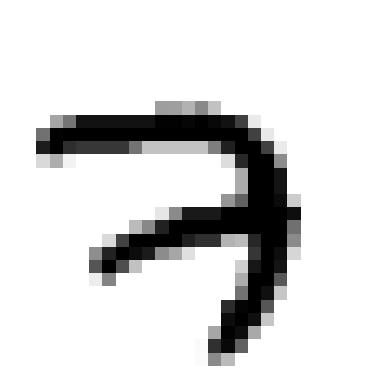

In [114]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

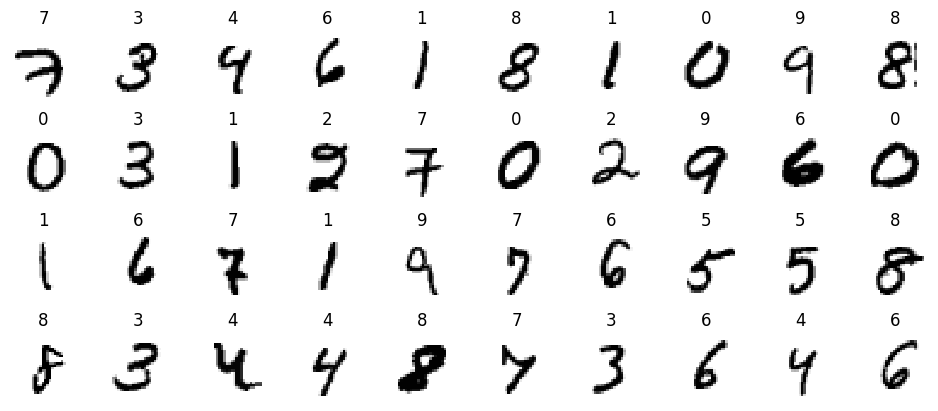

In [115]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [116]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [117]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [118]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [119]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 9s 5ms/step - loss: 1.3250 - accuracy: 0.6126 - val_loss: 2.3427 - val_accuracy: 0.0868


Text(0, 0.5, 'Loss')

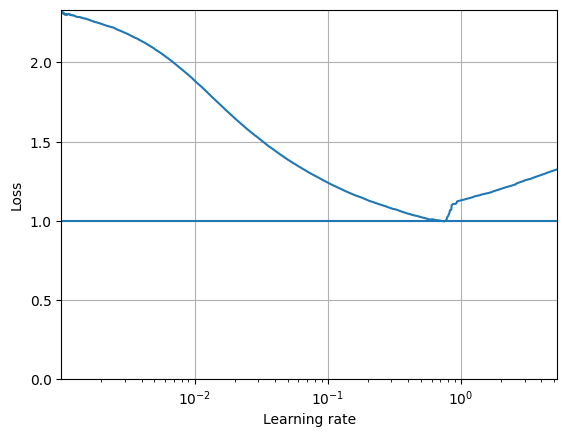

In [120]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [121]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [122]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [124]:
from pathlib import Path

run_index = 1
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [125]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 12s 6ms/step - loss: 0.2259 - accuracy: 0.9302 - val_loss: 0.0923 - val_accuracy: 0.9728
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0952 - accuracy: 0.9703 - val_loss: 0.0824 - val_accuracy: 0.9760
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0663 - accuracy: 0.9788 - val_loss: 0.1015 - val_accuracy: 0.9718
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0804 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.1678 - val_accuracy: 0.9582
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.0735 - val_accuracy: 0.9814
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0876 - val_a

In [126]:
model = tf.keras.models.load_model("my_mnist_model")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9770


[0.08329105377197266, 0.9769999980926514]

In [127]:
%tensorboard --logdir=./my_mnist_logs

<IPython.core.display.Javascript object>